# MAT 201A Homework 5
Chengyuan Xu, 18 Spring  

In [80]:
%pylab inline
rcParams['figure.figsize'] = (15,5) #wide graphs by default
from __future__ import print_function
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [81]:
from scipy.io import wavfile
from IPython.display import Audio


### Problem 1

Download the four audio files below (find them on the box). For each clip, compute the DFT\* of the entire file and then identify the index of the most prominent peaks in its magnitude spectrum. What frequencies (in Hz) correspond to the bins with the most prominent peaks? Note that `o.wav` has a different sampling rate.

Hint: use the `fft.rfft()` and `argmax()` (or `argsort()`) functions. Compute one real FFT with frame size equal to the number of samples for each file.


- _glockenspiel.wav_
- _piano.wav_
- _tom.wav_
- _o.wav_

\* The FFT gets you exactly what the DFT does, but the FFT is faster; Use `fft.rfft()` to get the DFT of real-valued signals.


### Problem 2

Using the same audio files, compute each clip's autocorrelation function and use it to identify the most salient frequency components (in Hz) in the signal. What frequencies are most prominent?

Hint: Use the `acorr()` function and use the lags associated with the most prominent peaks in the autocorrelation output to calculate the corresponding frequency. Alternatively, you may convolve the signal with itself, reversed. Or, use one of these built-ins:

- <https://docs.scipy.org/doc/numpy/reference/generated/numpy.correlate.html>
- <https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.signal.correlate.html>




### Problem 3


Estimate the pitch of each clip using the Cepstrum\*. Briefly discuss the pros and cons of the approaches in problems 1, 2, and 3. Under what circumstances would autocorrelation yeild "better" results than the DFT and vice versa? How does the Cepstrum pitch estimation do compared to the other two?

\* See the notebook named _Signal Modeling_ for a discussion of Cepstrum.


### glockenspiel

#### Problem 1

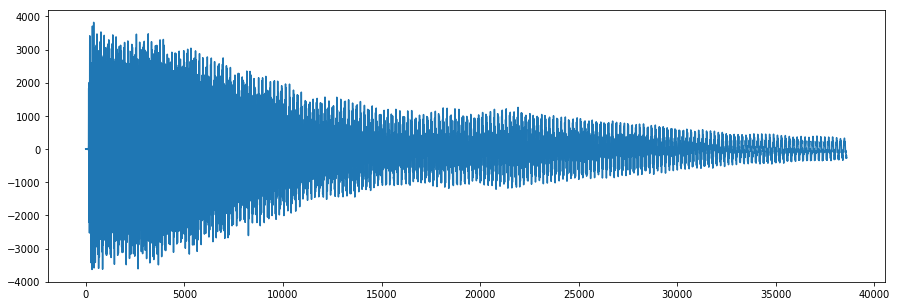

In [82]:
# read and plot the sound
g_sr, glockenspiel = wavfile.read('media/glockenspiel.wav')
plot(glockenspiel)
Audio(glockenspiel, rate=g_sr)

True fundamental frequency = 1323 Hz


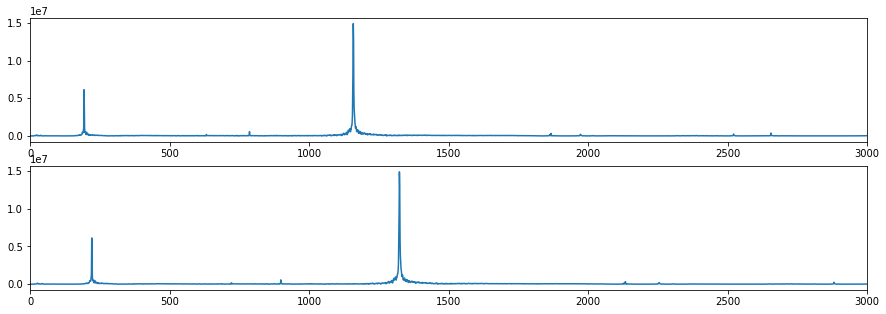

In [83]:
# get DFT, it's magnitude, and map it to the real frequency (change of scaling)
g_len = len(glockenspiel)

# DFT and plot result magnitude
g_rfft = fft.rfft(glockenspiel)
subplot(211) # linear magnitudes, number of bins (smaple# / 2 + 1)
g_rfft = abs(g_rfft)
plot(g_rfft)
xlim((0, 3000))

# map to actual frenquency
# this prints true... 
all(fft.rfftfreq(g_len, 1/g_sr) == linspace(0, g_sr/2, len(g_rfft), endpoint=True)) # all?

freqs = fft.rfftfreq(g_len, 1/g_sr)
subplot(212)
plot(freqs, g_rfft)
xlim((0, 3000))

# change scaling, get true fundamental
g_maxBin = argmax(g_rfft)
g_fundamental = freqs[g_maxBin]
print("True fundamental frequency =", int(g_fundamental),"Hz")

#### Problem 2

max = 2000 , total length = 4001


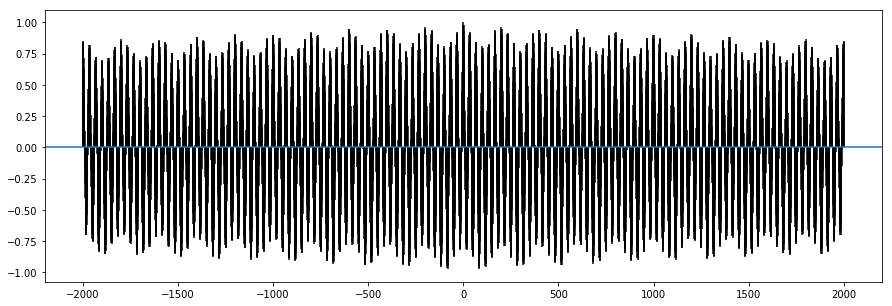

In [84]:
# by Karl, thanks!
lags, c, line, b = acorr(glockenspiel/max(glockenspiel), maxlags=2000)
print("max =", argmax(c[:]),", total length =", len(c))
# xlim(0,1000)
pass

not sure how to analyse this


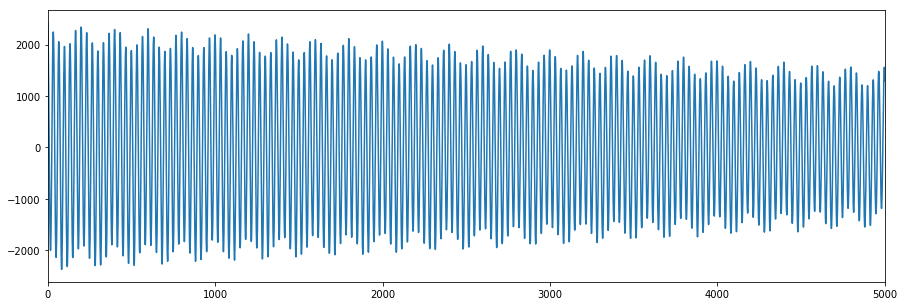

In [85]:
g_normal = glockenspiel/max(abs(glockenspiel)) # normalize to get float
g_correlate = correlate(g_normal, g_normal, mode='full') # correlate with itself
g_correlate = g_correlate[len(g_correlate)//2:] # just care about the half because it's mirrored

plot(g_correlate)
xlim(0, 5000)
print("not sure how to analyse this")

#### Problem 3

log_g_rfft                [9.88359092 8.64157399 8.46728772 8.40928553]
abs(ifft(log_g_rfft))     [0.         0.87252683 0.36496129 0.42698558 0.11226248]
irfft(log_g_rfft)         [0.         0.7718762  0.67587197 0.18415575 0.1529466 ]


(0, 100)

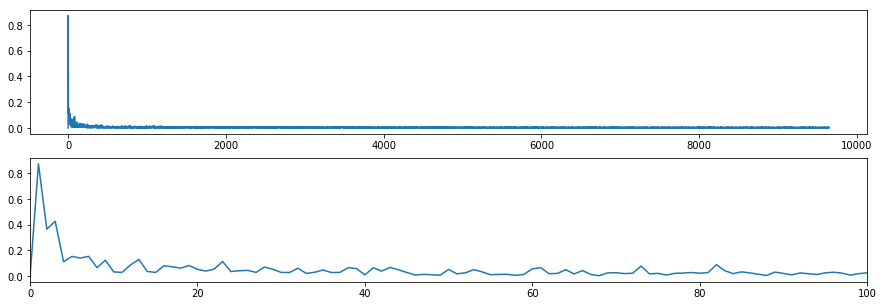

In [86]:
# log, inverse fft
log_g_rfft = log(g_rfft)
print("log_g_rfft", '{:>60}'.format(str(log_g_rfft[:4])))


g_cepstrum = abs(ifft(log_g_rfft))
g_cepstrum[:1] = 0
g_cepstrum = g_cepstrum[0:len(g_cepstrum)//2]
print("abs(ifft(log_g_rfft))", '{:>60}'.format(str(g_cepstrum[:5])))

# can we do irfft? why not?
g_cepstrum_r = irfft(log_g_rfft)
g_cepstrum_r[:1] = 0
print('\x1b[0;37;41m' + 'irfft' + '\x1b[0m' + '(log_g_rfft)', '{:>64}'.format(str(g_cepstrum_r[:5])))

subplot(211)
plot(g_cepstrum)

subplot(212)
plot(g_cepstrum)
xlim((0,100))

In [87]:
print("5 dominant frequency", argsort(g_cepstrum)[-5:])
print("The fundamental??? This can't be right...", g_sr / argsort(g_cepstrum)[-1])

5 dominant frequency [5 7 2 3 1]
The fundamental??? This can't be right... 44100.0


#### piano

#### Problem 1

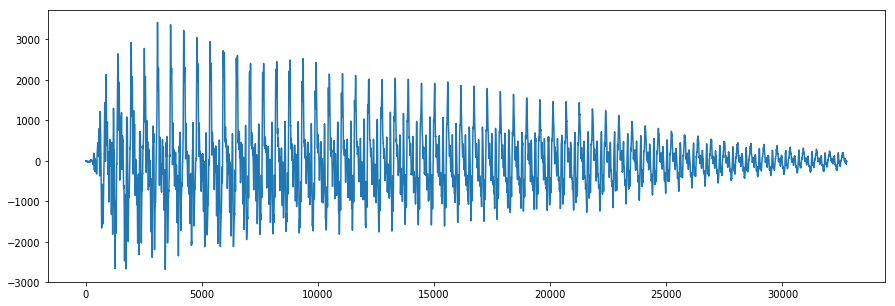

In [88]:
# read and plot the sound
p_sr, piano = wavfile.read('media/piano.wav')
plot(piano)
Audio(piano, rate=p_sr)

True fundamental frequency = 78 Hz


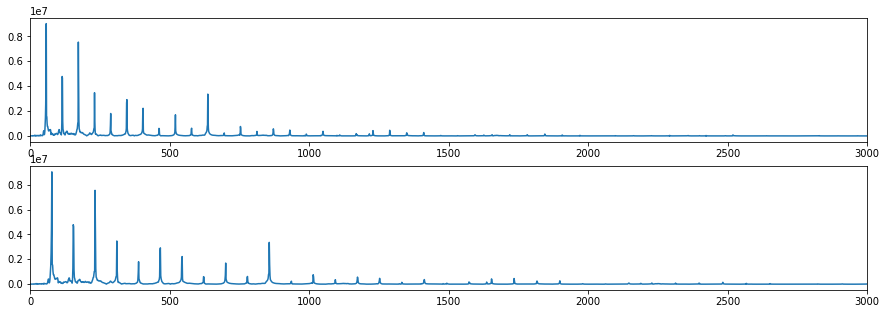

In [89]:
# get DFT, it's magnitude, and map it to the real frequency (change of scaling)
p_len = len(piano)

# DFT and plot result magnitude
p_rfft = fft.rfft(piano)
subplot(211) # linear magnitudes, number of bins (smaple# / 2 + 1)
p_rfft = abs(p_rfft)
plot(p_rfft)
xlim((0, 3000))

# map to actual frenquency
# this prints true... 
all(fft.rfftfreq(p_len, 1/p_sr) == linspace(0, p_sr/2, len(p_rfft), endpoint=True)) # all?

freqs = fft.rfftfreq(p_len, 1/p_sr)
subplot(212)
plot(freqs, p_rfft)
xlim((0, 3000))

# change scaling, get true fundamental
p_maxBin = argmax(p_rfft)
p_fundamental = freqs[p_maxBin]
print("True fundamental frequency =", int(p_fundamental),"Hz")

#### Problem 2

max = 2000 , total length = 4001


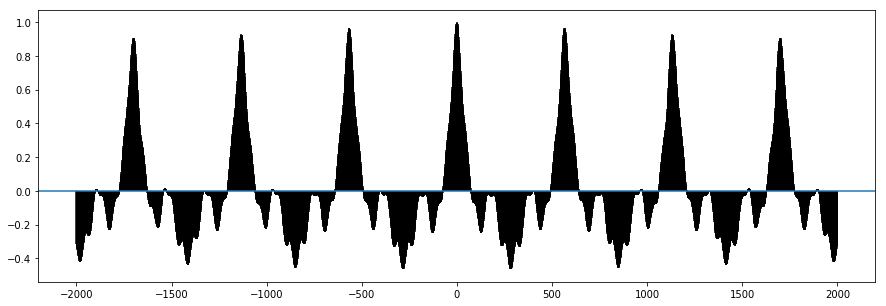

In [90]:
# by Karl, thanks!
lags, c, line, b = acorr(piano/max(piano), maxlags=2000)
print("max =", argmax(c[:]),", total length =", len(c))
# xlim(0,1000)
pass

not sure how to analyse this


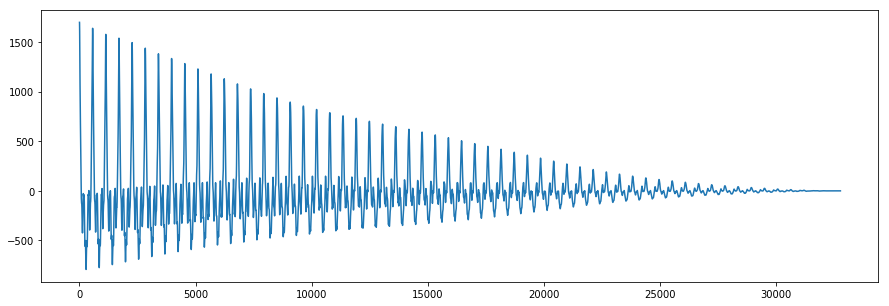

In [91]:
p_normal = piano/max(abs(piano)) # normalize to get float
p_correlate = correlate(p_normal, p_normal, mode='full') # correlate with itself
p_correlate = p_correlate[len(p_correlate)//2:] # just care about the half because it's mirrored

plot(p_correlate)
# xlim(0, 5000)
print("not sure how to analyse this")

#### Problem 3

log_p_rfft                [9.98658712 8.33330271 8.36386475 8.7594051 ]
abs(ifft(log_p_rfft))     [0.         1.05199142 0.43688095 0.42992872 0.14177564]
irfft(log_p_rfft)         [0.         0.7718762  0.67587197 0.18415575 0.1529466 ]


(0, 100)

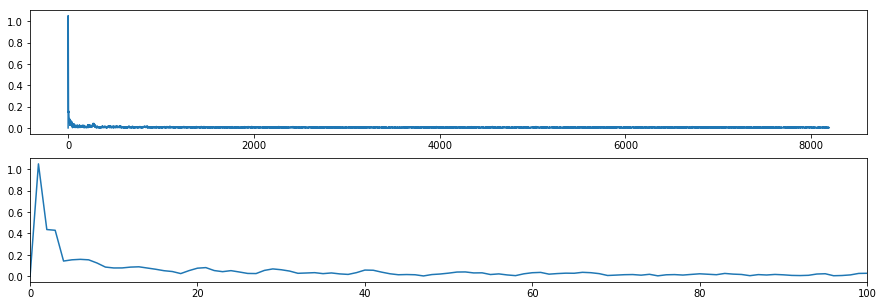

In [92]:
# log, inverse fft
log_p_rfft = log(p_rfft)
print("log_p_rfft", '{:>60}'.format(str(log_p_rfft[:4])))

p_cepstrum = abs(ifft(log_p_rfft))
p_cepstrum[:1] = 0
p_cepstrum = p_cepstrum[0:len(p_cepstrum)//2]
print("abs(ifft(log_p_rfft))", '{:>60}'.format(str(p_cepstrum[:5])))

# can we do irfft? why not?
p_cepstrum_r = irfft(log_p_rfft)
p_cepstrum_r[:1] = 0
print('\x1b[0;37;41m' + 'irfft' + '\x1b[0m' + '(log_p_rfft)', '{:>64}'.format(str(g_cepstrum_r[:5])))

subplot(211)
plot(p_cepstrum)

subplot(212)
plot(p_cepstrum)
xlim((0,100))

In [93]:
print("5 dominant frequency", argsort(p_cepstrum)[-5:])
print("The fundamental??? This can't be right...", p_sr / argsort(p_cepstrum)[-1])

5 dominant frequency [5 6 3 2 1]
The fundamental??? This can't be right... 44100.0


#### tom

#### Problem 1

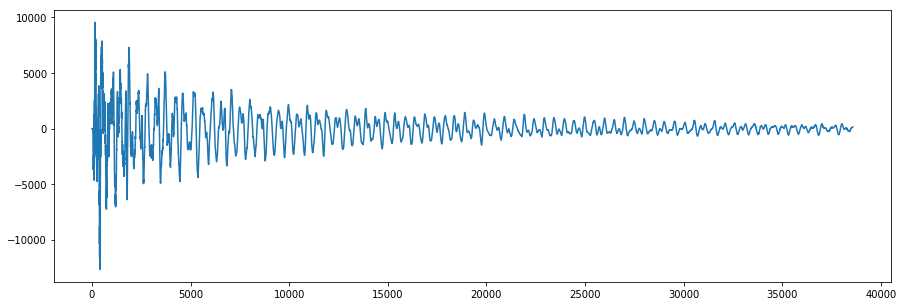

In [94]:
# read and plot the sound
t_sr, tom = wavfile.read('media/tom.wav')
plot(tom)
Audio(tom, rate=t_sr)

True fundamental frequency = 92 Hz


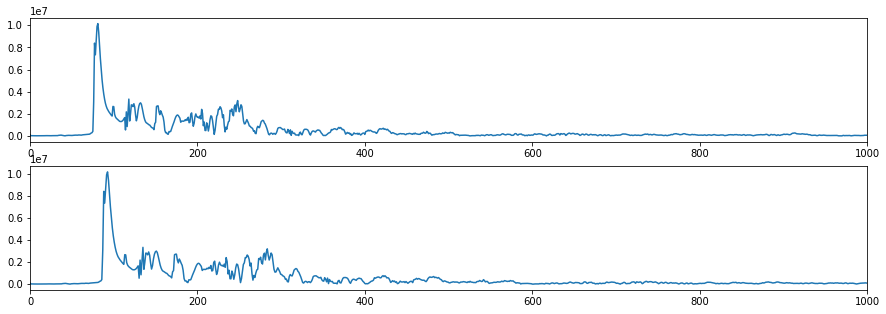

In [95]:
# get DFT, it's magnitude, and map it to the real frequency (change of scaling)
t_len = len(tom)

# DFT and plot result magnitude
t_rfft = fft.rfft(tom)
subplot(211) # linear magnitudes, number of bins (smaple# / 2 + 1)
t_rfft = abs(t_rfft)
plot(t_rfft)
xlim((0, 1000))

# map to actual frenquency
# this prints true... 
all(fft.rfftfreq(t_len, 1/t_sr) == linspace(0, t_sr/2, len(t_rfft), endpoint=True)) # all?

freqs = fft.rfftfreq(t_len, 1/t_sr)
subplot(212)
plot(freqs, t_rfft)
xlim((0, 1000))

# change scaling, get true fundamental
t_maxBin = argmax(t_rfft)
t_fundamental = freqs[t_maxBin]
print("True fundamental frequency =", int(t_fundamental),"Hz")

#### Problem 2

max = 4000 , total length = 8001


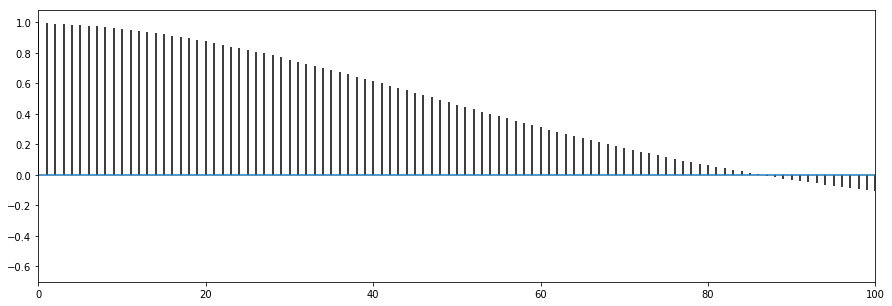

In [96]:
# by Karl, thanks!
lags, c, line, b = acorr(tom/max(tom), maxlags=4000)
print("max =", argmax(c[:]),", total length =", len(c))
xlim(0,100)
pass

92? nope...


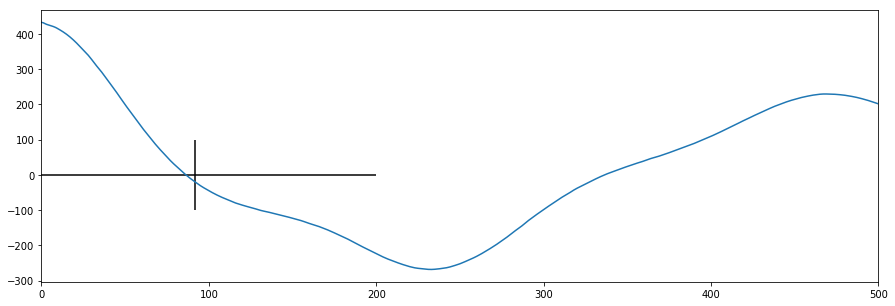

In [97]:
t_normal = tom/max(abs(tom)) # normalize to get float
t_correlate = correlate(t_normal, t_normal, mode='full') # correlate with itself
t_correlate = t_correlate[len(t_correlate)//2:] # just care about the half because it's mirrored

plot(t_correlate)
vlines(92, -100, 100)
hlines(0, 0, 200)
xlim(0, 500)
print("92? nope...")


#### Problem 3

log_t_rfft            [11.5214887  10.04188608 10.05084088  9.95485708]
abs(ifft(log_t_rfft))     [0.         0.94783945 0.42461952 0.22896715 0.18591939]
irfft(log_t_rfft)    [ 0.          1.15843584 -0.06216285  0.05180893  0.14167966]


(0, 100)

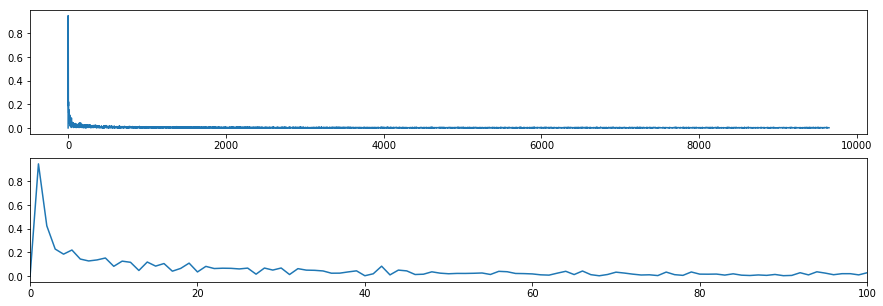

In [98]:
# log, inverse fft
log_t_rfft = log(t_rfft)
print("log_t_rfft", '{:>60}'.format(str(log_t_rfft[:4])))

t_cepstrum = abs(ifft(log_t_rfft))
t_cepstrum[0] = 0
t_cepstrum = t_cepstrum[0:len(t_cepstrum)//2]
print("abs(ifft(log_t_rfft))", '{:>60}'.format(str(t_cepstrum[:5])))

# can we do irfft? why not?
t_cepstrum_r = irfft(log_t_rfft)
t_cepstrum_r[:1] = 0
print('\x1b[0;37;41m' + 'irfft' + '\x1b[0m' + '(log_t_rfft)', '{:>64}'.format(str(t_cepstrum_r[:5])))

subplot(211)
plot(t_cepstrum)

subplot(212)
plot(t_cepstrum)
xlim((0,100))

In [99]:
print("5 dominant frequency", argsort(t_cepstrum)[-5:])
print("The fundamental??? This can't be right...", t_sr / argsort(t_cepstrum)[-1])

5 dominant frequency [4 5 3 2 1]
The fundamental??? This can't be right... 44100.0


#### o

#### Problem 1

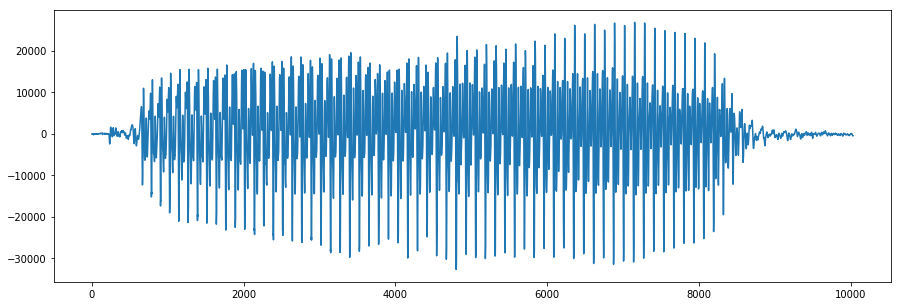

In [100]:
# read and plot the sound
o_sr, o = wavfile.read('media/o.wav')
plot(o)
Audio(o, rate=o_sr)

True fundamental frequency = 500 Hz


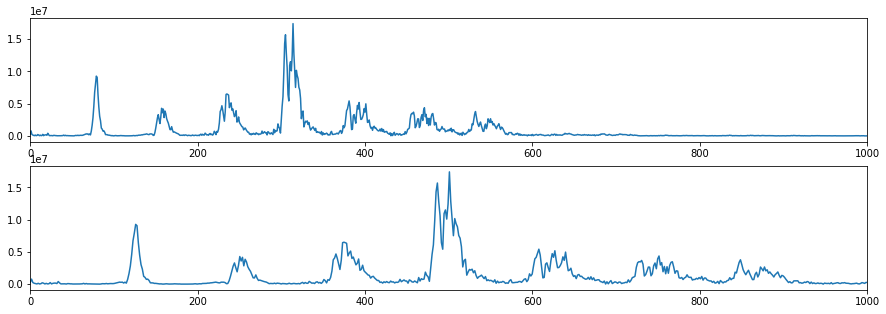

In [101]:
# get DFT, it's magnitude, and map it to the real frequency (change of scaling)
o_len = len(o)

# DFT and plot result magnitude
o_rfft = fft.rfft(o)
subplot(211) # linear magnitudes, number of bins (smaple# / 2 + 1)
o_rfft = abs(o_rfft)
plot(o_rfft)
xlim((0, 1000))

# map to actual frenquency
# this prints true... 
all(fft.rfftfreq(o_len, 1/o_sr) == linspace(0, o_sr/2, len(o_rfft), endpoint=True)) # all?

freqs = fft.rfftfreq(o_len, 1/o_sr)
subplot(212)
plot(freqs, o_rfft)
xlim((0, 1000))

# change scaling, get true fundamental
o_maxBin = argmax(o_rfft)
o_fundamental = freqs[o_maxBin]
print("True fundamental frequency =", int(o_fundamental),"Hz")

#### Problem 2

max = 2000 , total length = 4001


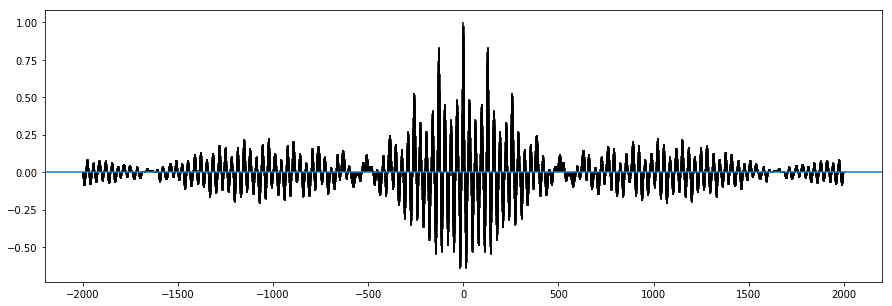

In [102]:
# by Karl, thanks!
lags, c, line, b = acorr(o/max(o), maxlags=2000)
print("max =", argmax(c[:]),", total length =", len(c))
# xlim(0,1000)
pass

500 here is interesting


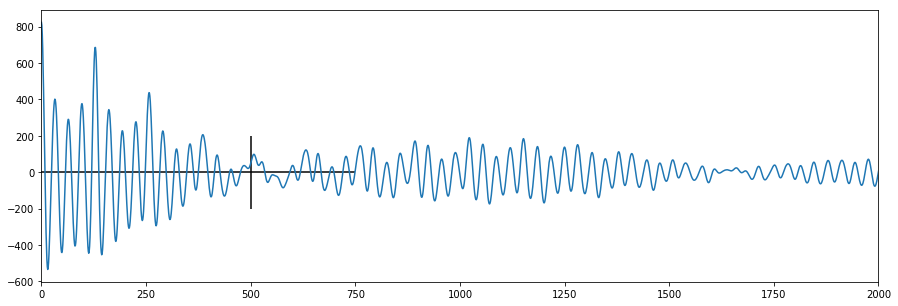

In [103]:
o_normal = o/max(abs(o)) # normalize to get float
o_correlate = correlate(o_normal, o_normal, mode='full') # correlate with itself
o_correlate = o_correlate[len(o_correlate)//2:] # just care about the half because it's mirrored

plot(o_correlate)
vlines(500, -200, 200)
hlines(0, 0, 750)
xlim(0, 2000)
print("500 here is interesting")

#### Problem 3

log_o_rfft            [12.49073642 13.56940156 12.43723254 11.88188316]
abs(ifft(log_o_rfft))     [0.         1.17566821 0.19007793 0.64535004 0.54691529]
irfft(log_o_rfft)    [ 0.          1.22870938  0.49773091 -0.11189425  0.12924846]


(0, 100)

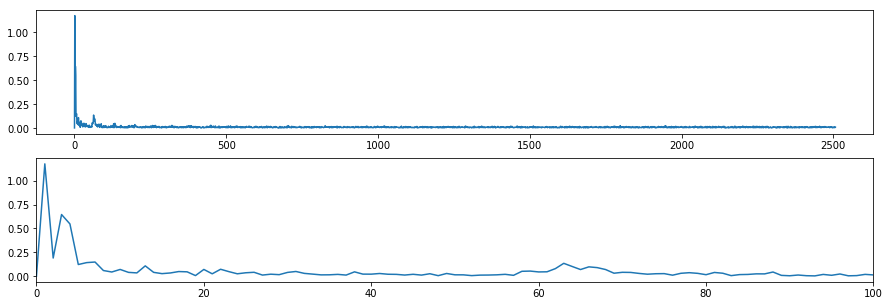

In [104]:
# log, inverse fft
log_o_rfft = log(o_rfft)
print("log_o_rfft", '{:>60}'.format(str(log_o_rfft[:4])))


o_cepstrum = abs(ifft(log_o_rfft))
o_cepstrum[:1] = 0
o_cepstrum = o_cepstrum[0:len(o_cepstrum)//2]
print("abs(ifft(log_o_rfft))", '{:>60}'.format(str(o_cepstrum[:5])))

# can we do irfft? why not?
o_cepstrum_r = irfft(log_o_rfft)
o_cepstrum_r[:1] = 0
print('\x1b[0;37;41m' + 'irfft' + '\x1b[0m' + '(log_o_rfft)', '{:>64}'.format(str(o_cepstrum_r[:5])))

subplot(211)
plot(o_cepstrum)

subplot(212)
plot(o_cepstrum)
xlim((0,100))

In [105]:
print("5 dominant frequency", argsort(o_cepstrum)[-5:])
print("The fundamental??? This can't be right...", o_sr / argsort(o_cepstrum)[-1])

5 dominant frequency [7 2 4 3 1]
The fundamental??? This can't be right... 16000.0



### Problem 4

Audio signals commonly suffer from ["mains hum"](https://en.wikipedia.org/wiki/Mains_hum). Download (from the box) _AlanWattsWithMainsHum.wav_ and _MainsHum.wav_. Design a filter to clean up the noisy recording of Alan Watts. Start by plotting the magitude spectrum of the mains hum. Use both autocorrelation and the DFT to characterize this signal: Where are the peaks of its spectrum? What, if any, pattern do you see in the spectral peaks? How broad/narrow are the peaks?

Design a filter to combat the scourge of mains hum. This filter should look like the inverse of the spectrum of the mains hum signal. When applied, it should reduce the energy of any signal with the spectral peaks of the mains hum example. Apply this filter to the given noisy signal. Plot the magnitude spectrum of the resulting signal. Discuss how well/badly your filter worked.

Consider a [Comb filter][] () or many [Notch filter][].

[Comb filter]: https://en.wikipedia.org/wiki/Comb_filter
[Notch filter]: https://en.wikipedia.org/wiki/Band-stop_filter

You might use numpy/scipy functions such as [`iirnotch`][], [`lfilter`][], [`freqz`][], etc.


[`iirnotch`]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirnotch.html
[`lfilter`]: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.lfilter.html>
[`freqz`]: https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.freqz.html


- <https://bradysalz.com/post/comb-filter>

/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


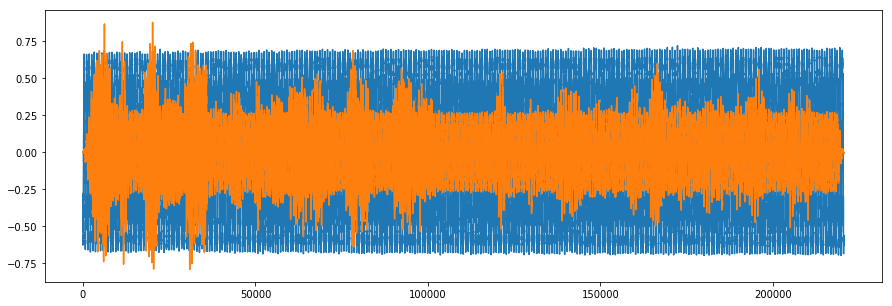

In [111]:
# read and plot the sound
h_sr, hum = wavfile.read('media/MainsHum.wav')
plot(hum)
Audio(hum, rate=h_sr)

a_sr, alan = wavfile.read('media/AlanWattsWithMainsHum.wav')
plot(alan)
Audio(alan, rate=a_sr)

True fundamental frequency = 60 Hz


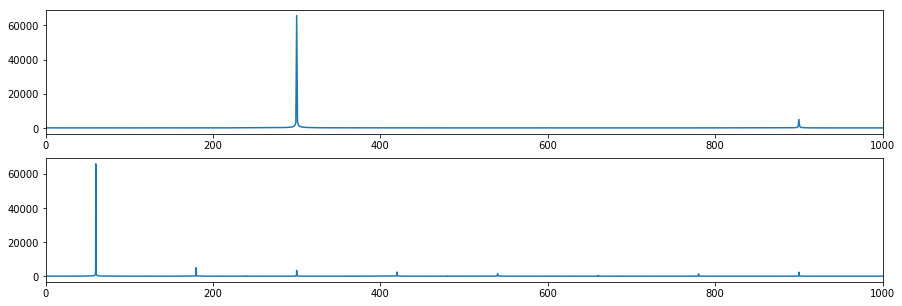

In [107]:
# get DFT, it's magnitude, and map it to the real frequency (change of scaling)
h_len = len(hum)

# DFT and plot result magnitude
h_rfft = fft.rfft(hum)
subplot(211) # linear magnitudes, number of bins (smaple# / 2 + 1)
h_rfft = abs(h_rfft)
plot(h_rfft)
xlim((0, 1000))

# map to actual frenquency
freqs = fft.rfftfreq(h_len, 1/h_sr)
subplot(212)
plot(freqs, h_rfft)
xlim((0, 1000))

# change scaling, get true fundamental
h_maxBin = argmax(h_rfft)
h_fundamental = freqs[h_maxBin]
print("True fundamental frequency =", int(h_fundamental),"Hz")

(0, 300)

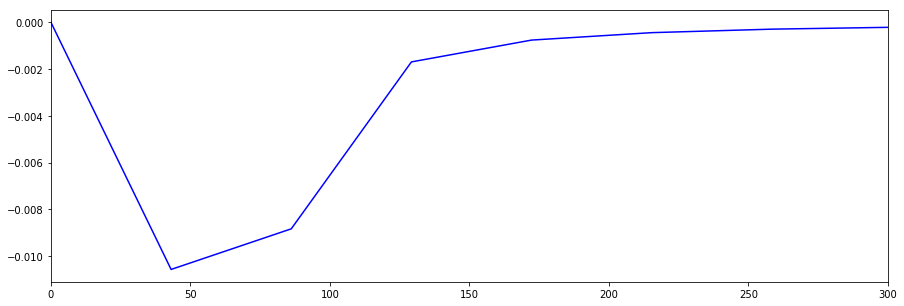

In [108]:
# code from Karl
from scipy import signal

fs = h_sr    # Sample frequency (Hz)
f0 = 60.0         # Frequency to be removed from signal (Hz)
Q = 30.0           # Quality factor # Q = w0/bw
w0 = f0 / (fs / 2) # Normalized Frequency

# Design notch filter
b, a = signal.iirnotch(w0, Q)

# Frequency response
w, h = signal.freqz(b, a)

# Generate frequency axis
freq = w * fs / (2 * pi)
plot(freq, 20 * log10(abs(h)), color='blue')
xlim(0, 300)

hmmm... it looks different but can't hear the difference


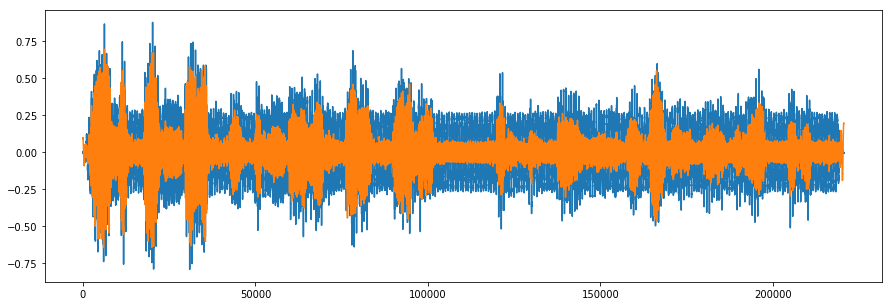

In [109]:
f = signal.filtfilt(b, a, alan)
plot(alan) # plot original sample
plot(f) # plot the filtered sample
print("hmmm... it looks different but can't hear the difference")

Audio(data = f, rate = a_sr)

(0, 120)

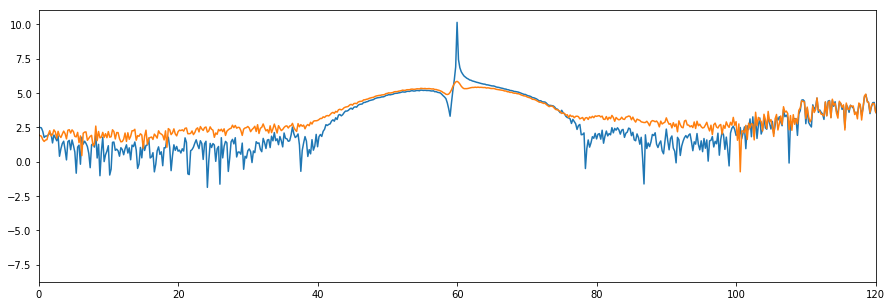

In [110]:
plot(freqs,log(abs(rfft(alan))))
plot(freqs,log(abs(rfft(f))))
xlim(0,120)